In [ ]:
from analytics_module.time_series import PairAnalyzer
from data_loader.get_data import GetStockData
import json
import sklearn
from yfinance import Ticker, download
from tqdm import tqdm
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [ ]:
with open('./data_loader/tickers.json') as f:
    tickers = json.load(f)
full_list = []
for key in tickers.keys():
    full_list.extend(tickers[key])
full_list = list(set(full_list))[:100]
start_date = '2023-06-01'
end_date = '2023-07-01'

In [ ]:
s = GetStockData()
df = s.collate_dataset(full_list, start_date, end_date)


In [ ]:
df_pivot = df.pivot(columns='ticker', values='close')

In [ ]:
df_pivot_2 = df_pivot.dropna(axis=1)


In [ ]:
X = df_pivot_2.values.T


In [ ]:
reducer = umap.UMAP(n_components=3, random_state=42)
embedding = reducer.fit_transform(X)


In [ ]:
print(sklearn.__version__)

In [ ]:
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(embedding)
    inertia.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(embedding)

# Get the cluster assignments for each point in the dataset
cluster_assignments = kmeans.predict(embedding)

# Create a dictionary where the keys are the cluster indices
# and the values are the tickers in that cluster
cluster_dict = {}
for i in range(len(cluster_assignments)):
    cluster_id = cluster_assignments[i]
    ticker = df_pivot_2.columns[i]
    
    if cluster_id not in cluster_dict:
        cluster_dict[cluster_id] = [ticker]
    else:
        cluster_dict[cluster_id].append(ticker)

print(cluster_dict)

In [ ]:
print(cluster_assignments)

In [ ]:
# Plotting in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = embedding[:, 0]
y = embedding[:, 1]
z = embedding[:, 2]

ax.scatter(x, y, z)
plt.show()

In [ ]:
client = MongoClient('localhost', 27017)
db = client["equity_data"]
collection = db["price_data"]

In [ ]:
tickers = ['SMCI', 'LSCC', 'OVV', 'SAIA', 'CHK', 'CELH', 'EME', 'WSC', 'SWAV', 'PFGC', 'WCC', 'TTEK', 'BJ', 'CAR', 'KNSL', 'KBR', 'INSP', 'AR', 'EGP', 'THC', 'MEDP', 'GTLS', 'RRC', 'HR', 'TXRH', 'KRTX', 'AMKR', 'RCM', 'CHX', 'SWN', 'APG', 'HLI', 'SSD', 'CMC', 'MUR', 'MUSA', 'CROX', 'RBC', 'RBC', 'IGT', 'PDCE', 'MTDR', 'IRDM', 'STAG', 'APPF', 'SPSC', 'UFPI', 'ELF', 'ATKR', 'NOVT', 'FIX', 'TNET', 'SIGI', 'RETA', 'WTS', 'RLI', 'OPCH', 'ATI', 'PBF', 'ONTO', 'COKE', 'ITCI', 'SSB', 'LNTH', 'HQY', 'RMBS', 'DDS', 'MSTR', 'TENB', 'HALO', 'RHP', 'BBIO', 'WK', 'ISEE', 'BECN', 'POWI', 'MTH', 'ENSG', 'TMHC', 'LANC', 'ESNT', 'CWEN', 'ZWS', 'PSN', 'ASAN', 'QLYS', 'KNTK', 'KRG', 'HGV', 'MMS', 'BIPC', 'VLY', 'WING', 'RRR', 'MTSI', 'ONB', 'FIZZ', 'HOMB', 'NSIT', 'TRNO', 'ORA', 'NEOG', 'BMI', 'BRBR', 'CERE', 'PWSC', 'IPAR', 'SWX', 'EXLS', 'SLAB', 'HLNE', 'FOXF', 'MGY', 'TRTN', 'HAE', 'FFIN', 'POR', 'SGRY', 'GT', 'FELE', 'MLI', 'COLB', 'EXPO', 'BOX', 'PCVX', 'CADE', 'ASO', 'FLR', 'M', 'FN', 'UBSI', 'ENS', 'HP', 'VC', 'GATX', 'OGS', 'KBH', 'DEN', 'LTHM', 'SUM', 'ETRN', 'DOCN', 'FCFS', 'BCPC', 'NJR', 'CWST', 'SM', 'MMSI', 'IBP', 'DIOD', 'PCH', 'RDN', 'AMN', 'BCC', 'TEX', 'PECO', 'FOCS', 'MP', 'ESGR', 'BDC', 'BLKB', 'GOLF', 'SKY', 'BKH', 'IMGN', 'SFM', 'WHD', 'NSP', 'FUL', 'CBT', 'VSH', 'VICR', 'PGNY', 'BXMT', 'BPMC', 'COOP', 'INST', 'DNLI', 'SMPL', 'CVI', 'HRI', 'JBT', 'MDC', 'FLYW', 'EXPI', 'PNM', 'SPXC', 'SEM', 'FOLD', 'RUSHB', 'EPRT', 'IRT', 'ASGN', 'APPN', 'FSS', 'NNI', 'SDGR', 'GKOS', 'FRO', 'MDGL', 'PFSI', 'HWC', 'OTTR', 'JOE', 'WOR', 'AVNT', 'GPI', 'CRC', 'BE', 'KWR', 'CNMD', 'KRYS', 'EXTR', 'SYNA', 'NTLA', 'ARWR', 'SIG', 'HI', 'LFST', 'GBCI', 'ITRI', 'RUSHA', 'PRTA', 'BL', 'SEAS', 'OI', 'APLE', 'DOC', 'VRNS', 'GEF', 'LCII', 'CRVL', 'URBN', 'EVH', 'ZD', 'MC', 'AXSM', 'KLIC', 'HL', 'SANM', 'LTH', 'BCO', 'TGNA', 'NWE', 'ENV', 'MATX', 'HELE', 'UMBF', 'NOG', 'SR', 'CVLT', 'UCBI', 'CRK', 'APAM', 'BANF', 'CNX', 'PACB', 'SHAK', 'KOS', 'JJSF', 'PTEN', 'LGIH', 'AWR', 'TPH', 'PBH', 'PRVA', 'RIOT', 'BTU', 'NARI', 'LIVN', 'IRTC', 'PDCO', 'SFBS', 'VRRM', 'ESMT', 'TDW', 'TWNK', 'CYTK', 'YELP', 'SPT', 'WDFC', 'ROG', 'FWRD', 'ITGR', 'FROG', 'IBOC', 'CNS', 'BNL', 'STEP', 'GMS', 'AXNX', 'CWT', 'TMDX', 'IAS', 'UNF', 'WD', 'ARNC', 'RVMD', 'IMVT', 'FHI', 'INSM', 'TCBI', 'HUBG', 'PTCT', 'WERN', 'SBRA', 'CBU', 'DY', 'CRS', 'BRP', 'NSA', 'CALX', 'CCOI', 'FIBK', 'AMPH', 'THS', 'NPO', 'FORM', 'LXP', 'SITC', 'SITM', 'OFC', 'WIRE', 'AVA', 'MGEE', 'GNW', 'APLS', 'NUVL', 'ARRY', 'MARA', 'OMCL', 'ARCB', 'AMRC', 'CSWI', 'GHC', 'CNO', 'ASB', 'LBRT', 'MHO', 'MAC', 'REZI', 'RPD', 'DAN', 'BOOT', 'CSTM', 'CBZ', 'CATY', 'PLXS', 'DORM', 'KFY', 'AX', 'KDNY', 'PZZA', 'INTA', 'NEX', 'FBP', 'SXT', 'CWH', 'IOSP', 'RXRX', 'ATRC', 'WSFS', 'PIPR', 'KAI', 'PRGS', 'STNG', 'INDB', 'ESE', 'DBRG', 'DNUT', 'GRBK', 'CORT', 'CVCO', 'CVBF', 'MORF', 'EVTC', 'AVAV', 'STAA', 'ENR', 'CARG', 'SFNC', 'OUT', 'CRDO', 'CEIX', 'BRC', 'SHOO', 'MWA', 'AVDX', 'MGPI', 'EBC', 'CCS', 'IDCC', 'SKT', 'CPE', 'TR', 'GSHD', 'VIAV', 'GFF', 'MTRN', 'MYRG', 'PSMT', 'PPBI', 'VRNT', 'AUB', 'NHI', 'PD', 'XPRO', 'COUR', 'KTB', 'HASI', 'CWK', 'MGRC', 'DOOR', 'UTZ', 'FULT', 'KMT', 'ARCH', 'HCC', 'NAVI', 'BLMN', 'ICFI', 'NGVT', 'KW', 'FCPT', 'XPEL', 'DICE', 'NMIH', 'NKLA', 'CALM', 'PRMW', 'SONO', 'EVCM', 'ESTE', 'BEAM', 'SJW', 'FA', 'BKU', 'NUVA', 'OII', 'CENT', 'NEO', 'IIPR', 'GMTX', 'EQC', 'FFBC', 'THRM', 'HRMY', 'PRFT', 'SCL', 'GPRE', 'ATEC', 'TROX', 'CPK', 'SHO', 'TBBK', 'QTWO', 'HLIO', 'INSW', 'NOVA', 'CENTA', 'WGO', 'CBRL', 'COHU', 'CTRE', 'SBCF', 'VGR', 'TRN', 'MGNI', 'CNK', 'LAUR', 'EPC', 'WAFD', 'MTX', 'JACK', 'VTYX', 'FSR', 'NTCT', 'UE', 'OSIS', 'ROCK', 'BATRK', 'MOD', 'HTH', 'ANF', 'STGW', 'B', 'PJT', 'MXL', 'TALO', 'SAVE', 'GSAT', 'RDNT', 'ULCC', 'RVNC', 'SKYW', 'GOGO', 'PLAY', 'STRL', 'CRGY', 'VCYT', 'ODP', 'RAMP', 'PATK', 'PARR', 'GLNG', 'CRSR', 'AROC', 'SNEX', 'WLY', 'KTOS', 'SWTX', 'VRTV', 'FRME', 'ATGE', 'VIR', 'PCT', 'SMTC', 'PRG', 'PEB', 'CLBK', 'CAKE', 'ROIC', 'HURN', 'STRA', 'TOWN', 'CMPR', 'BKE', 'DK', 'MRTN', 'GVA', 'IBTX', 'MLNK', 'SOVO', 'HEES', 'VSTO', 'MYGN', 'SAH', 'LILA', 'TGH', 'SXI', 'RES', 'LILAK', 'DVAX', 'PI', 'SPWR', 'SSTK', 'PRO', 'PDFS', 'DRH', 'NVEE', 'PRIM', 'IRWD', 'KAR', 'UDMY', 'EAT', 'SUPN', 'ERII', 'ENVA', 'PGTI', 'CTOS', 'RNST', 'EYE', 'VRE', 'KN', 'OXM', 'PHR', 'VCEL', 'CLDX', 'UCTT', 'PCRX', 'LOB', 'PLAB', 'ANDE', 'RDFN', 'LRN', 'CSGS', 'FBK', 'GERN', 'WSBC', 'OSTK', 'RADI', 'SATS', 'RLJ', 'BANR', 'IMKTA', 'HPK', 'ROAD', 'NBTB', 'CMP', 'ZUO', 'DHT', 'OFG', 'TRMK', 'TTEC', 'GTY', 'AMLX', 'ZNTL', 'SAFE', 'RILY', 'USPH', 'NWBI', 'ETWO', 'TGTX', 'CNNE', 'EPAC', 'JELD', 'EFSC', 'NWN', 'PRCT', 'NWLI', 'SPNT', 'FOR', 'DGII', 'MSGE', 'NTB', 'PLUS', 'SPNS', 'CARS', 'MLKN', 'PTVE', 'SMMT', 'TNC', 'PLMR', 'COCO', 'UFPT', 'CHCO', 'VRTS', 'ARI', 'ECVT', 'FCF', 'NG', 'TTMI', 'SNDX', 'TNK', 'NUS', 'VECO', 'USM', 'CPRX', 'FNA', 'RLAY', 'OMI', 'MDRX', 'GBX', 'GCMG', 'LNN', 'CIM', 'ATSG', 'OPK', 'RCUS', 'NAPA', 'XNCR', 'CHEF', 'MSEX', 'RCKT', 'MMI', 'CTS', 'HLX', 'ESRT', 'MPLN', 'VKTX', 'CASH', 'RVLV', 'SVC', 'HTLF', 'PFS', 'LKFN', 'SCHL', 'MATW', 'LMAT', 'LTC', 'LADR', 'SYBT', 'MBIN', 'DFIN', 'CMRE', 'NSSC', 'LPRO', 'DEA', 'SGH', 'BHVN', 'LZB', 'UPWK', 'XHR', 'BCRX', 'SFL', 'EAF', 'TMCI', 'FBNC', 'UEC', 'TWO', 'HLIT', 'TWST', 'MCRI', 'RYI', 'EVRI', 'UNIT', 'ARVN', 'KNSA', 'WABC', 'IDYA', 'KALU', 'STC', 'CNXN', 'NBHC', 'SBH', 'TH', 'CUBI', 'HOPE', 'OEC', 'FDP', 'WINA', 'CBAY', 'MODN', 'JBSS', 'AMWD', 'RC', 'TVTX', 'MEI', 'PTLO', 'USNA', 'ECPG', 'ENFN', 'HTLD', 'MBUU', 'UVV', 'RYTM', 'REPL', 'HMN', 'CTKB', 'CMCO', 'DNOW', 'GDEN', 'KROS', 'UNFI', 'STBA', 'EWCZ', 'YEXT', 'TCBK', 'PUMP', 'HNI', 'TRUP', 'CCF', 'NMRK', 'LPG', 'VERV', 'KYMR', 'BUSE', 'NTST', 'MNKD', 'KFRC', 'SNCY', 'ARR', 'OSW', 'IESC', 'USLM', 'ATEN', 'MEG', 'ASTE', 'VBTX', 'STER', 'SRCE', 'FLGT', 'LGND', 'MFA', 'MNRO', 'CIR', 'NBR', 'MD', 'DDD', 'FWRG', 'MDVL', 'HCCI', 'EB', 'PMT', 'AVNS', 'KRUS', 'ETNB', 'RXST', 'NXGN', 'WNC', 'FBRT', 'AZZ', 'CRNC', 'ICHR', 'GES', 'IRBT', 'AXL', 'CXW', 'ASIX', 'APOG', 'OCFC', 'GNL', 'GIC', 'SASR', 'MED', 'SANA', 'CLNE', 'KRO', 'PTGX', 'BZH', 'APPS', 'DCPH', 'NRC', 'SAFT', 'STEM', 'TRS', 'FRG', 'SKIN', 'XPOF', 'ARGO', 'NXRT', 'PGRE', 'EIG', 'ARLO', 'AVID', 'PLRX', 'SBSI', 'TMST', 'WTTR', 'CRNX', 'GDOT', 'AMSF', 'OBNK', 'SLP', 'UMH', 'UUUU', 'IMAX', 'INFN', 'OM', 'BHLB', 'ATRI', 'WWW', 'CDE', 'SCS', 'SLCA', 'ARKO', 'LBAI', 'INNV', 'CAL', 'SCHN', 'PLYM', 'HWKN', 'FBMS', 'DAWN', 'WRLD', 'CSR', 'AMRX', 'MIRM', 'MRC', 'PFBC', 'FUBO', 'BRKL', 'VREX', 'BGS', 'DRQ', 'AMRK', 'RGR', 'THR', 'GIII', 'COGT', 'NX', 'EBIX', 'PAR', 'INVA', 'TELL', 'RPT', 'GEO', 'NGMS', 'HCSG', 'BHE', 'BRSP', 'CCRN', 'BFC', 'KIDS', 'ARCT', 'DIN', 'NYMT', 'XMTR', 'CHCT', 'ANIP', 'MDXG', 'PRAA', 'SHEN', 'PRDO', 'SAVA', 'BFS', 'NAT', 'EFC', 'NHC', 'PRA', 'QTRX', 'RBCAA', 'CFFN', 'AOSL', 'SIBN', 'OFLX', 'IBRX', 'WW', 'UBA', 'NVRO', 'PDM', 'IMXI', 'BSIG', 'TDS', 'TTGT', 'SILK', 'GTN', 'INBX', 'GABC', 'BJRI', 'CCO', 'FCEL', 'LC', 'CDRE', 'BXC', 'VTOL', 'QCRH', 'RPAY', 'PRLB', 'HZO', 'SBGI', 'TMP', 'PLPC', 'DCOM', 'BLX', 'GRC', 'CENX', 'KREF', 'RWT', 'EGBN', 'RSI', 'VERA', 'SMP', 'BLFS', 'ARDX', 'BDN', 'THRY', 'IIIV', 'SXC', 'RGNX', 'ULH', 'AVO', 'BY', 'SSP', 'TGI', 'DLX', 'UTL', 'HY', 'BANC', 'TWI', 'REVG', 'RAPT', 'PEBO', 'HCAT', 'ETD', 'KOP', 'BIGC', 'CRMT', 'CNOB', 'PLOW', 'COLL', 'SPTN', 'BASE', 'CNDT', 'SNPO', 'CDMO', 'PFC', 'ASLE', 'GDYN', 'SP', 'CHS', 'SCSC', 'CHUY', 'BALY', 'BMEA', 'RMR', 'REPX', 'POWL', 'KE', 'TITN', 'MYE', 'SCVL', 'CYRX', 'OFIX', 'OSBC', 'BV', 'CRAI', 'CLFD', 'DX', 'AORT', 'KURA', 'ATRO', 'CVLG', 'LYEL', 'VSEC', 'HSTM', 'MLAB', 'WOW', 'CTBI', 'JRVR', 'SCU', 'BKD', 'PBI', 'BLBD', 'INN', 'CVGW', 'RNA', 'AMTB', 'RICK', 'MVIS', 'SCWX', 'GSBC', 'PHAT', 'IHRT', 'DXPE', 'MTW', 'CLSK', 'LASR', 'HOV', 'TK', 'AMWL', 'TRNS', 'AVXL', 'UHT', 'KELYA', 'DENN', 'DBI', 'BVH', 'FCBC', 'HFWA', 'REX', 'GMRE', 'KAMN', 'ARQT', 'TTI', 'HAYN', 'GPRO', 'HCKT', 'HBT', 'FMBH', 'AMOT', 'FC', 'CEVA', 'EGLE', 'ARIS', 'TYRA', 'MAX', 'DOMO', 'CCSI', 'WTI', 'IIIN', 'SNBR', 'BBSI', 'TSE', 'FORR', 'MOV', 'MCRB', 'GNK', 'BOC', 'GLDD', 'DCO', 'ONEW', 'FDMT', 'DMRC', 'CYH', 'JOUT', 'LAND', 'EDIT', 'LIND', 'BRY', 'CCB', 'TRTX', 'ZEUS', 'IDT', 'YORW', 'PAHC', 'SWBI', 'HTBK', 'HIBB', 'DM', 'EOLS', 'VVI', 'TBPH', 'HA', 'ATNI', 'TRDA', 'LAW', 'CDNA', 'ATLC', 'HAFC', 'TRST', 'UVSP', 'XPER', 'LEGH', 'PTSI', 'TILE', 'SFIX', 'OSPN', 'ORGO', 'SRI', 'IRMD', 'ASPN', 'FPI', 'EBF', 'CFB', 'NFBK', 'MBWM', 'KRNY', 'FLWS', 'DTC', 'MPX', 'CTLP', 'NPK', 'HVT', 'COOK', 'JANX', 'MRNS', 'ANAB', 'CLW', 'CCBG', 'MCFT', 'RBBN', 'TIPT', 'FRPH', 'DHIL', 'RGP', 'HCI', 'MCBS', 'MODV', 'HBNC', 'SMBC', 'WASH', 'TARS', 'LEU', 'HSII', 'PGC', 'AVD', 'CERS', 'GOOD', 'SRG', 'BFST', 'ATEX', 'TCMD', 'CASS', 'BFLY', 'MSBI', 'UFCS', 'LBC', 'FMNB', 'LQDT', 'VPG', 'LUNG', 'VALU', 'MCB', 'DHC', 'WSR', 'EZPW', 'SHYF', 'CAC', 'OIS', 'MCS', 'RCEL', 'ITOS', 'PETQ', 'IVR', 'PACK', 'CPF', 'RXT', 'CATC', 'HIFS', 'HONE', 'CSV', 'DGICA', 'SOI', 'MITK', 'AMSC', 'BATRA', 'BW', 'MBI', 'NR', 'TRC', 'QNST', 'UVE', 'BH', 'SKYT', 'MXCT', 'THFF', 'TBI', 'EWTX', 'FFIC', 'CLDT', 'ODC', 'AVTE', 'VITL', 'SWIM', 'SRDX', 'AURA', 'SPFI', 'NRIX', 'TPC', 'LOVE', 'CMBM', 'CRBU', 'ICPT', 'BBCP', 'CSTL', 'DSGN', 'AMNB', 'EYPT', 'MLR', 'OTLK', 'IGMS', 'WVE', 'FTCI', 'OLP', 'IBCP', 'ARTNA', 'FSBC', 'VHI', 'SENS', 'SMBK', 'KODK', 'OPY', 'FF', 'GCI', 'CNSL', 'EVC', 'HTBI', 'TPB', 'EQBK', 'CGEM', 'ORC', 'URGN', 'EBS', 'ONTF', 'NTGR', 'BHB', 'CCNE', 'FNKO', 'SIGA', 'NUVB', 'PLM', 'LSEA', 'SGHT', 'VEL', 'ARAY', 'KRT', 'DJCO', 'PLCE', 'BLUE', 'TERN', 'AMSWA', 'CTO', 'ERAS', 'CDLX', 'NVEC', 'FATE', 'FHTX', 'QUOT', 'ENTA', 'BLNK', 'FFWM', 'GEVO', 'BAND', 'EBTC', 'CUTR', 'CPSI', 'CVRX', 'LOCO', 'MPB', 'ORIC', 'OOMA', 'ZUMZ', 'GNTY', 'CHRS', 'BRT', 'LXRX', 'MOFG', 'BOOM', 'SRRK', 'OLMA', 'LPSN', 'UIS', 'GLRE', 'SB', 'MGTX', 'AXGN', 'ICVX', 'RLGT', 'OPI', 'IBEX', 'UTMD', 'DSKE', 'CARE', 'TSVT', 'IPI', 'KALV', 'RRBI', 'AVNW', 'RMAX', 'VLGEA', 'GCO', 'GLUE', 'TWOU', 'HQI', 'NVTA', 'CVGI', 'HYLN', 'OCUL', 'GATO', 'LXFR', 'ANIK', 'TCX', 'SMMF', 'PNTG', 'ANGO', 'PGEN', 'OSUR', 'AROW', 'BMRC', 'WTBA', 'PRTH', 'MCBC', 'VNDA', 'DAKT', 'GBIO', 'PRPL', 'VMD', 'USD', 'PFIS', 'MVBF', 'NATH', 'CLAR', 'NWPX', 'CZNC', 'VUZI', 'AVAH', 'CPS', 'HMPT', 'TAST', 'SEER', 'BSRR', 'GOEV', 'EVI', 'RM', 'ZYXI', 'FARO', 'FLIC', 'AMRS', 'RYAM', 'SLQT', 'EEX', 'CSTR', 'PETS', 'TNYA', 'GWRS', 'PMVP', 'TREE', 'PCYO', 'MGNX', 'DSP', 'LUNA', 'PSTL', 'ITIC', 'LE', 'IMRX', 'BWB', 'FISI', 'PKE', 'WSBF', 'HBCP', 'NODK', 'FNLC', 'CURV', 'GPMT', 'OMGA', 'PLSE', 'STOK', 'BIG', 'CIVB', 'WLFC', 'CBNK', 'FDBC', 'SENEA', 'LMNR', 'URG', 'HFFG', 'NL', 'NGVC', 'WLDN', 'PRTS', 'VIGL', 'AVIR', 'EGRX', 'BVS', 'EOSE', 'REFI', 'SSTI', 'CDZI', 'CMTL', 'STRO', 'RBB', 'DNMR', 'KLTR', 'GHL', 'BLFY', 'REAL', 'NRIM', 'TCBX', 'OB', 'OMER', 'ILPT', 'AMTX', 'NATR', 'YMAB', 'WKHS', 'OCN', 'TLYS', 'RPHM', 'SBTX', 'PBFS', 'POWW', 'TPIC', 'HT', 'LCTX', 'MEC', 'ORRF', 'TUP', 'PKOH', 'RMNI', 'GRWG', 'FRBA', 'CNTY', 'OPRX', 'BHR', 'SFST', 'MG', 'OUST', 'VRCA', 'FRST', 'PPTA', 'TG', 'AOMR', 'RIGL', 'INZY', 'SPWH', 'FSBW', 'RRGB', 'FULC', 'EGAN', 'STKS', 'UIHC', 'GRPN', 'RLYB', 'CDXS', 'DLTH', 'EVER', 'BTAI', 'SGMO', 'EHTH', 'FLL', 'VOXX', 'CELC', 'KOPN', 'HOFT', 'NSTG', 'MASS', 'ATRA', 'SPPI', 'TRHC', 'INFU', 'BGFV', 'CIO', 'VRA', 'VOR', 'OPRT', 'KPTI', 'ATOM', 'ESCA', 'CCRD', 'JYNT', 'INBK', 'ZVIA', 'APYX', 'FRGI', 'FGEN', 'MHLD', 'HBIO', 'CSTE', 'ANNX', 'NGM', 'HRTX', 'DOUG', 'CRMD', 'HEAR', 'LAB', 'IKNA', 'SEEL', 'REKR', 'MNMD', 'BCOV', 'NOTV', 'TCS', 'CCCC', 'INGN', 'XOMA', 'IPSC', 'PRLD', 'VSTM', 'BNGO', 'MPAA', 'LAZY', 'INVE', 'CARA', 'CATO', 'ITI', 'TLS', 'PVBC', 'FOA', 'LVO', 'LVO', 'GRTS', 'FREE', 'MTRX', 'CLPT', 'VERI', 'ESPR', 'KVHI', 'CUE', 'HMST', 'PBYI', 'XBIT', 'KOD', 'NDLS', 'SELB', 'KZR', 'BSET', 'CTRN', 'YELL', 'BEEM', 'SGC', 'CTSO', 'DIBS', 'BRBS', 'GLT', 'SRNE', 'CTXR', 'RCKY', 'FTHM', 'GRPH', 'PSTX', 'THRX', 'UEIC', 'FOSL', 'HBB', 'ATOS', 'UFI', 'BCAB', 'HNST', 'OCGN', 'PLBY', 'NNBR', 'BDTX', 'ORMP', 'INO', 'PRCH', 'MRSN', 'AXTI', 'VATE', 'SRT', 'GOSS', 'CDXC', 'KNTE', 'CIA', 'PRTK', 'AOUT', 'UPLD', 'TALS', 'STXS', 'GTHX', 'LCUT', 'BBBY', 'HRTG', 'GLSI', 'TSAT', 'LL', 'RENT', 'DZSI', 'CTMX', 'CONN', 'MMAT', 'NKTX', 'ATHA', 'STTK', 'VXRT', 'TCRT', 'CASA', 'VERU', 'PSNL', 'KRON', 'NPCE', 'IMUX', 'CMRX', 'QMCO', 'FLXS', 'APLT', 'HOWL', 'BHG', 'LVLU', 'DRIO', 'BDSX', 'PYXS', 'SERA', 'DMTK', 'RAD', 'FORA', 'SPRB', 'TKNO', 'MESA', 'APEI', 'DRRX', 'ASXC', 'EAR', 'GAN', 'SLDB', 'SPRO', 'CRIS', 'BYRN', 'SYRS', 'CRDF', 'INSG', 'RLMD', 'XLO', 'FIXX', 'FBIO', 'BNED', 'IDEX', 'ELYM', 'SCOR', 'SMSI', 'CURO', 'TIL', 'HLTH', 'ICAD', 'AVRO', 'DTIL', 'AXDX', 'FXLV', 'FRBK', 'RGS', 'PRAX', 'VIRX', 'CLNN', 'NCMI', 'HOFV', 'SURF', 'CURI', 'VIA', 'LTRPA', 'OMIC', 'EVLO', 'STIM', 'SDIG', 'XXII', 'HYFM', 'SGTX', 'PRTG', 'FLNT', 'BOLT', 'RFL', 'MGTA', 'PASG', 'MEIP', 'RAIN', 'DNAY', 'JOAN', 'SIEN', 'TSHA', 'HOOK', 'XGN', 'MBIO', 'RPID', 'KIRK', 'TXMD', 'ATER', 'TISI', 'BLI', 'BYSI', 'VIEW', 'NLS', 'PAVM', 'BCEL', 'EMKR', 'CRTX', 'KALA', 'RIDE', 'SFT', 'CAMP', 'VHC', 'IMPL', 'OCX', 'CSSE', 'SNSE', 'MTEM', 'VBIV', 'NLTX', 'EIGR', 'HRT', 'AQB', 'UAVS', 'HARP', 'VINC', 'AWH', 'AWH', 'ONCT', 'FBRX', 'DMS', 'FREQ', 'VAPO', 'VTGN', 'AUD', 'TLIS', 'ATHX', 'FNCH', 'AMTI', 'LABP', 'INFI', 'SI', 'APPH', 'LSF', 'OTRK', 'FUV', 'TNXP', 'TRVN', 'GTBP', 'IBIO', 'NEXI', 'DBD', 'TTCF', 'VRAY', 'AMPE', 'NH', 'AVTX', 'SQZ', 'HGEN', 'EBET', 'RUBY', 'GNLN', 'ONCR', 'NMTR', 'CDAK', 'HYRE', 'KLDO', 'NESR', 'CRD-A', 'GEF-B']
#record = yf.download(tickers[-100:-1], start=start_date, end=end_date)
#print(record)

In [ ]:
from collections import Counter
freq_dict = Counter(tickers)

# Sort the dictionary items by value in descending order
sorted_freq_dict = dict(sorted(freq_dict.items(), key=lambda item: item[1], reverse=True))

print(sorted_freq_dict)


In [ ]:
data = yf.download(tickers[:5], start=start_date, end=end_date)['Close']


In [ ]:
data.index = data.index.strftime("%Y-%m-%d")
print(data.to_dict())

In [ ]:
def get_ticker_data(ticker_name):
    # Setup MongoDB client
    client = MongoClient('mongodb://localhost:27017/')
    db = client['equity_data']
    collection = db['price_data']

    # Query MongoDB for the given ticker
    cursor = collection.find({"ticker": ticker_name, "date": {"$gte": datetime(2000, 1, 1), "$lte": datetime.now()}})


    # Convert to pandas DataFrame
    df = pd.DataFrame(list(cursor))
    # Convert 'date' from string to datetime and set as index
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)


    # Select only 'close' column
    df = df[['close']]

    return df

get_ticker_data("SM")

In [ ]:
data = download("ABB", start="2023-06-01", end="2023-07-01")
print(data)

In [ ]:
from data_loader.get_data import GetStockData

data_fetcher = GetStockData()

tickers = data_fetcher.get_ticker_names()
names = []
for ticker in tickers:
    info = data_fetcher.get_ticker_field_info(ticker, field='longName')
    if info is not None:
        names.append(ticker +":"+ info)
    else:
        names.append(ticker)
print(names)

In [ ]:
ticker = 'PL'
df = data_fetcher.get_data(ticker)
df = data_fetcher.collate_dataset(['PL', 'BRKL'])
df_pivot = df.pivot(columns='ticker', values='close')
df_pivot['PL'].name

In [ ]:
from datetime import datetime, timedelta, date
from data_loader.get_data import GetStockData
from analytics_module.time_series import PairAnalyzer, TimeSeries
import numpy as np
import plotly.graph_objects as go

def update_time_series_plot(ticker, s_date, e_date):
    try:
        start_date = datetime.strptime(s_date, "%Y-%m-%dT%H:%M:%S.%f").strftime("%Y-%m-%d")
    except:
        start_date = s_date
    try:
        end_date = datetime.strptime(e_date, "%Y-%m-%dT%H:%M:%S.%f").strftime("%Y-%m-%d")
    except:
        end_date = e_date
    cutoff = 0.05

    # Fetch data
    data_fetcher = GetStockData()
    data_fetcher.set_dates(start_date, end_date)
    df = data_fetcher.get_data(ticker)
    ts = df['close'].values

    # Test for stationarity
    data_analyzer = TimeSeries(ts, ticker)
    is_stationary, p_value = data_analyzer.check_for_stationarity(cutoff=cutoff)
    p_value = np.round(p_value, 5)
    # Create figure
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df.index, y=ts, mode='lines', name=ticker))
    fig.update_layout(title=f"{ticker} (Stationary: {is_stationary}/{p_value})", xaxis_title="Date", yaxis_title="Price")
    
    return fig

fig = update_time_series_plot('PL', '2023-07-01', '2023-08-01')

In [ ]:
g = GetStockData()
g.set_dates('2018-06-01', '2023-06-01')
cursor = g.get_data_date_range('ABB')
import pandas as pd
df = pd.DataFrame(list(cursor))
df['close'].count()


In [ ]:
import yfinance
data = yfinance.download(['AO.LSE', 'TSLA', 'AMZN'], start='2018-06-01', end='2023-06-01', group_by="ticker", period='1d')

In [ ]:
df = pd.read_excel('utils/russell_2000.xlsx')

In [ ]:
import json
with open('./data_loader/tickers.json') as f:
    tickers = json.load(f)

tickers_2 = df['Ticker'].tolist()


In [ ]:
print(len(tickers_2) - len(tickers['russel']))

len(set(tickers['russel'] + tickers_2))

In [ ]:
russell_tickers = df['Ticker'].tolist()
with open('./data_loader/tickers.json') as f:
    tickers = json.load(f)
tickers["russell"] = russell_tickers
with open('./data_loader/tickers.json', 'w') as f:
    json.dump(tickers, f)

In [ ]:
data = data.dropna(axis=1, how='all')
print(set([ticker for ticker,_ in data.columns]))

In [ ]:
print(data.head(10))

In [1]:
from data_loader.get_data import GetStockData
g = GetStockData()
earliest_date, latest_date = g.get_ticker_date_range('fw')

In [2]:
print(type(earliest_date))

<class 'NoneType'>


In [10]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from tslearn.barycenters import dtw_barycenter_averaging
def create_time_series(n, start=0, var=0.1):
    """
    Creates a random walk time series.

    Parameters
    ----------
    n : int
        Length of the time series.
    var : float
        Variance of the random walk.

    Returns
    -------
    list
        The time series.
    """
    ts = [np.random.normal(2*start, var)]
    for i in range(n-1):
        ts.append(ts[-1] + np.random.normal(0, var))
    return np.array(ts)


def create_seasonal_series(n, period=10, var=0.1):
    """
    Create a seasonal random walk time series.

    Parameters
    ----------
    n : int
        Length of the time series.
    period : int

    Returns
    -------
    list
        The time series.
    """
    ts = []
    for i in range(n):
        ts.append(np.random.normal(0, var) + np.sin(i * np.pi / period))
    return np.array(ts)


def create_increasing_series(n, alpha, var=0.1):
    """
    Create a linearly incresing time series.

    Parameters
    ----------
    n : int
        Length of the time series.
    alpha : float
        Slope of the line.

    Returns
    -------
    list
        The time series.
    """
    ts = []
    for i in range(n):
        ts.append(np.random.normal(0, var) + alpha * i)
    return np.array(ts)

def create_non_stationary_series(n, lag, var=0.1):
    """
    Create a non-stationary time series.

    Parameters
    ----------
    n : int
        Length of the time series.
    lag : int

    Returns
    -------
    list
        The time series.
    """
    ts = []
    for i in range(n):
        if i < lag:
            ts.append(np.random.normal(0, var) + np.sin(i * np.pi / lag))
        else:
            ts.append(ts[-lag] + np.random.normal(0, var))
    return np.array(ts)

/Users/maxpowers/miniconda3/envs/finance/lib/python3.11/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [11]:
n=365*2
m = 9
table = []
for i in range(1, 2000//m):
    table.extend([create_seasonal_series(n, 10, 0.1), create_seasonal_series(n, 10, 0.1)+  create_increasing_series(n, 0.05, 0.1), 
                  create_non_stationary_series(n, 10)])
    table.extend([create_seasonal_series(n, 20, 0.2), create_seasonal_series(n, 10, 0.1) -  create_increasing_series(n, 0.05, 0.2), 
                  create_non_stationary_series(n, 15) + create_seasonal_series(n, 10, 0.1)])
    table.extend([create_seasonal_series(n, 5, 0.01), create_seasonal_series(n, 10, 0.1)*create_increasing_series(n, 0.05, 0.1), 
                  create_non_stationary_series(n, 30)])

In [13]:
print(len(table), len(table[0]))

1989 730


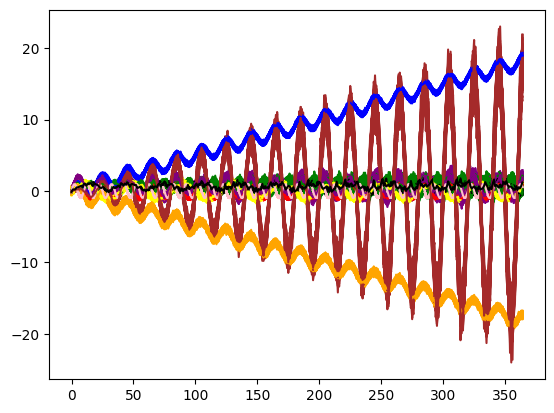

In [119]:
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'orange', 5: 'purple', 6: 'pink', 7: 'brown', 8: 'black', 9: 'gray'}
for t, data in enumerate(table):
    c = color_dict[t % m]
    plt.plot(data, color=c)
plt.show()

[*********************100%***********************]  10 of 10 completed


2 Failed downloads:
['LN']: Exception('%ticker%: No timezone found, symbol may be delisted')
['HBA']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")


In [6]:
import pandas as pd
from pymongo import MongoClient
from datetime import datetime
from data_loader.data_loader import SetStockData
from data_loader.get_data import GetStockData
import json
from tqdm import tqdm

In [9]:

s_date = "2020-06-01"
e_date = "2023-06-01"
g = GetStockData()
g.set_dates(s_date, e_date)
tickers = g.get_ticker_names()
X = g.collate_dataset(tickers, s_date, e_date)

100%|██████████| 2391/2391 [00:23<00:00, 102.89it/s]


In [10]:
g.set_dates('1990-01-01', '2023-08-01')
data = g.get_data('AAPL')
print(data.head(10))
print(data.tail(10))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
               close
date                
1990-01-02  0.332589
1990-01-03  0.334821
1990-01-04  0.335938
1990-01-05  0.337054
1990-01-08  0.339286
1990-01-10  0.321429
1990-01-11  0.308036
1990-01-15  0.305804
1990-01-16  0.311384
1990-01-17  0.296875
                 close
date                  
2023-07-18  193.729996
2023-07-19  195.100006
2023-07-20  193.130005
2023-07-21  191.940002
2023-07-24  192.750000
2023-07-25  193.619995
2023-07-26  194.500000
2023-07-27  193.220001
2023-07-28  195.830002
2023-07-31  196.449997


In [11]:
df = X.pivot(columns='ticker', values='close')
threshold = 0.2
df = df.dropna(thresh=len(df) * (1 - threshold), axis=1)

# Step 2: Remove rows with more than 5 consecutive NaNs
drop_window = 5
consecutive_nans = df.isna().rolling(window=drop_window+1, min_periods=drop_window+1).sum().max(axis=1)
rows_to_remove = consecutive_nans[consecutive_nans >= drop_window+1].index
df = df.drop(rows_to_remove)

# Step 3: Interpolate missing values with implicit variance
# Using 'polynomial' interpolation as an example; you can choose other methods
df = df.interpolate(method='polynomial', order=2)
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')
normalized_df = (df - df.mean()) / df.std()

In [16]:
from collections import defaultdict
import numpy as np
from minisom import MiniSom

In [18]:
X_ = normalized_df.values.T
som_x, som_y = int(np.sqrt(np.sqrt(len(X_))))-1, int(np.sqrt(np.sqrt(len(X_))))-1
som = MiniSom(som_x, som_y, X_.shape[1], sigma=.3, learning_rate=0.1, 
              neighborhood_function='gaussian', random_seed=10)
som.pca_weights_init(X_)
print("Training...")
som.train_batch(X_, 50000, verbose=True)  # random training
print("\n...ready!")




Training...
 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 11.164092719304424

...ready!


In [20]:
win_map = som.win_map(X_)
store_dict = defaultdict(list)
for idx, column in enumerate(normalized_df.columns):
    winner_node = som.winner(X_[idx])
    store_dict[winner_node[0]*som_y+winner_node[1]+1].append(column)

In [48]:
from collections import defaultdict
store_dict = defaultdict(list)
for idx, column in enumerate(normalized_df.columns):
    winner_node = som.winner(X_[idx])
    store_dict[winner_node[0]*som_y+winner_node[1]+1].append(column)

for key in store_dict.keys():
    if len(store_dict[key]) < 2:
        del store_dict[key]

In [ ]:
from collections import Counter

In [53]:
print(store_dict[1])

['AA', 'AAPL', 'AMN', 'AMRK', 'AMTB', 'ANDE', 'AOSL', 'APOG', 'ASIX', 'AVGO', 'AVID', 'BCC', 'BECN', 'BFS', 'BVH', 'BXC', 'CCB', 'COKE', 'COOP', 'COST', 'CPE', 'CPK', 'CTO', 'DEN', 'DHIL', 'ECPG', 'FTNT', 'FUL', 'FWRD', 'GATX', 'GDEN', 'GNR', 'HGV', 'HWC', 'HWKN', 'IRMD', 'KFRC', 'KNTK', 'L', 'M', 'MAR', 'MATX', 'MCRI', 'MET', 'MOV', 'NPO', 'ONTO', 'PANW', 'PAYX', 'PFBC', 'PG', 'PLUS', 'PTSI', 'QCRH', 'REG', 'RHP', 'RUSHA', 'SCHL', 'SEAS', 'SFBS', 'SMBC', 'TD', 'TGH', 'UFPI', 'UNFI', 'VTLE', 'WCC', 'WH', 'WM']


In [55]:
len([(store_dict[cluster][i], store_dict[cluster][j]) for cluster in store_dict for i in range(len(store_dict[cluster])) for j in range(i+1, len(store_dict[cluster]))])

41108

KeyboardInterrupt: 

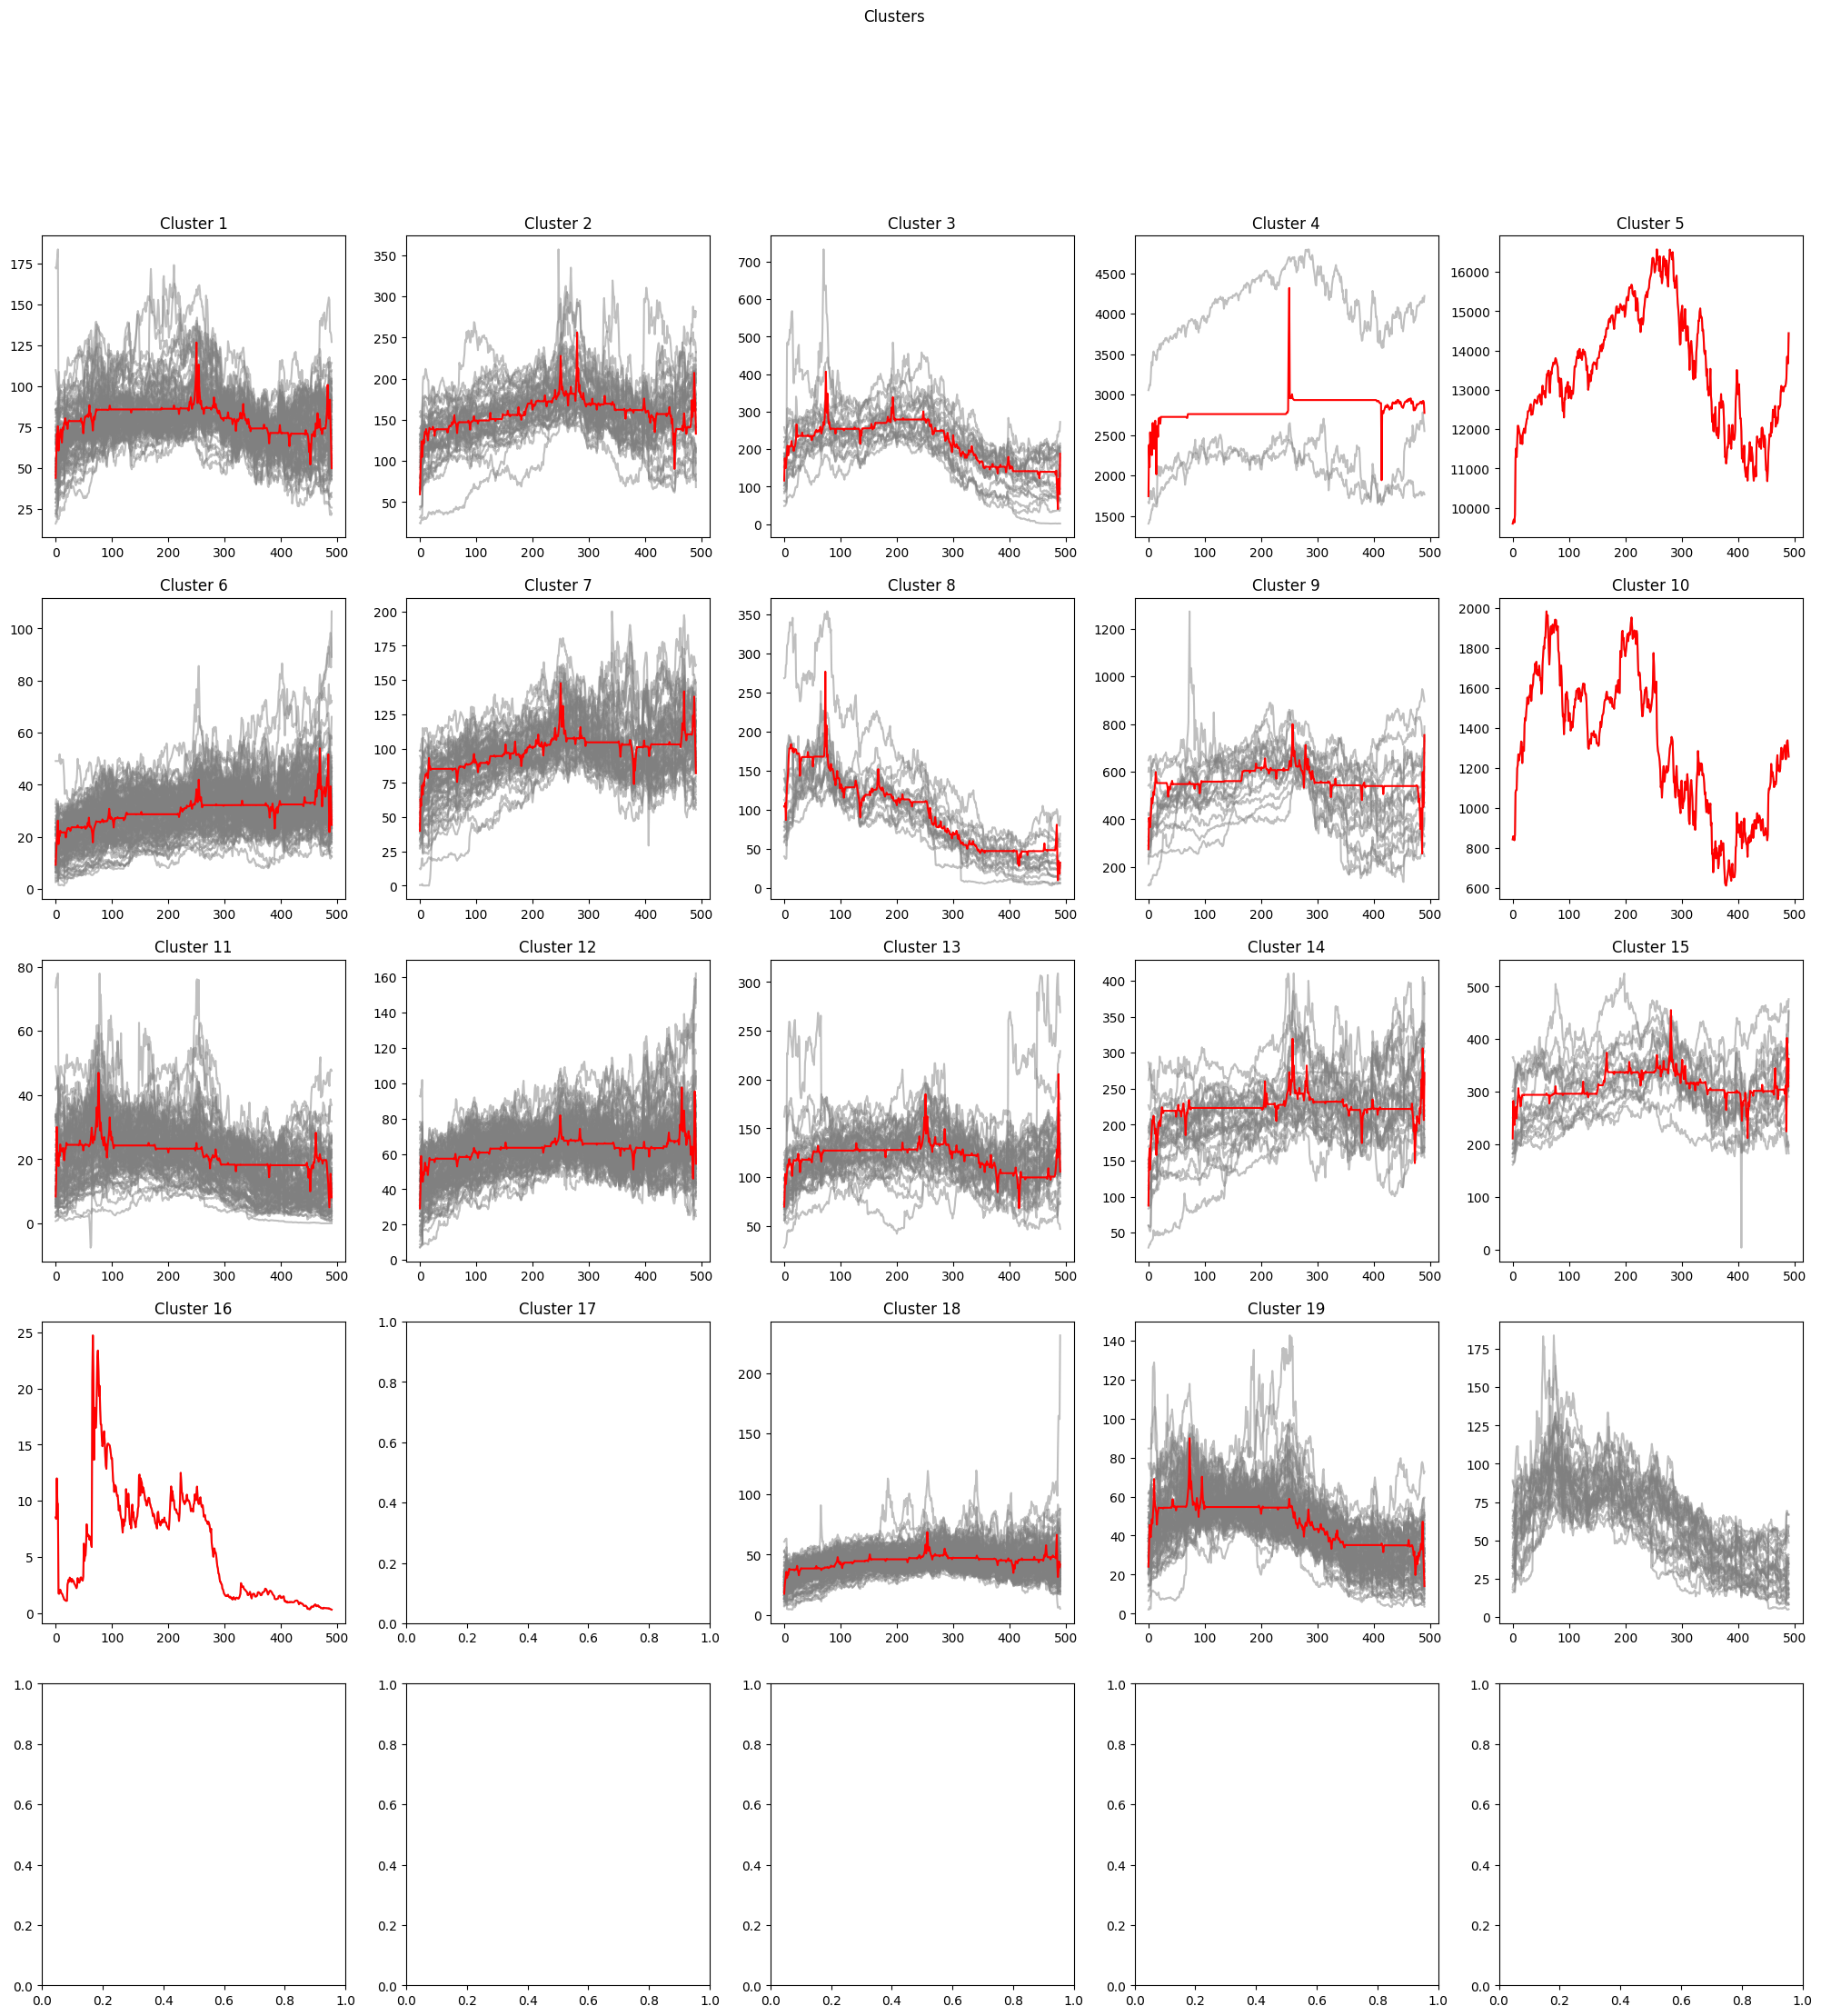

In [33]:
# Little handy function to plot series
def plot_som_series_dba_center(som_x, som_y, win_map):
    fig, axs = plt.subplots(som_x,som_y,figsize=(25,25))
    fig.suptitle('Clusters')
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[cluster].plot(series,c="gray",alpha=0.5) 
                axs[cluster].plot(dtw_barycenter_averaging(np.vstack(win_map[cluster])),c="red") # I changed this part
            cluster_number = x*som_y+y+1
            axs[cluster].set_title(f"Cluster {cluster_number}")

    plt.show()
plot_som_series_dba_center(som_x, som_y, win_map)

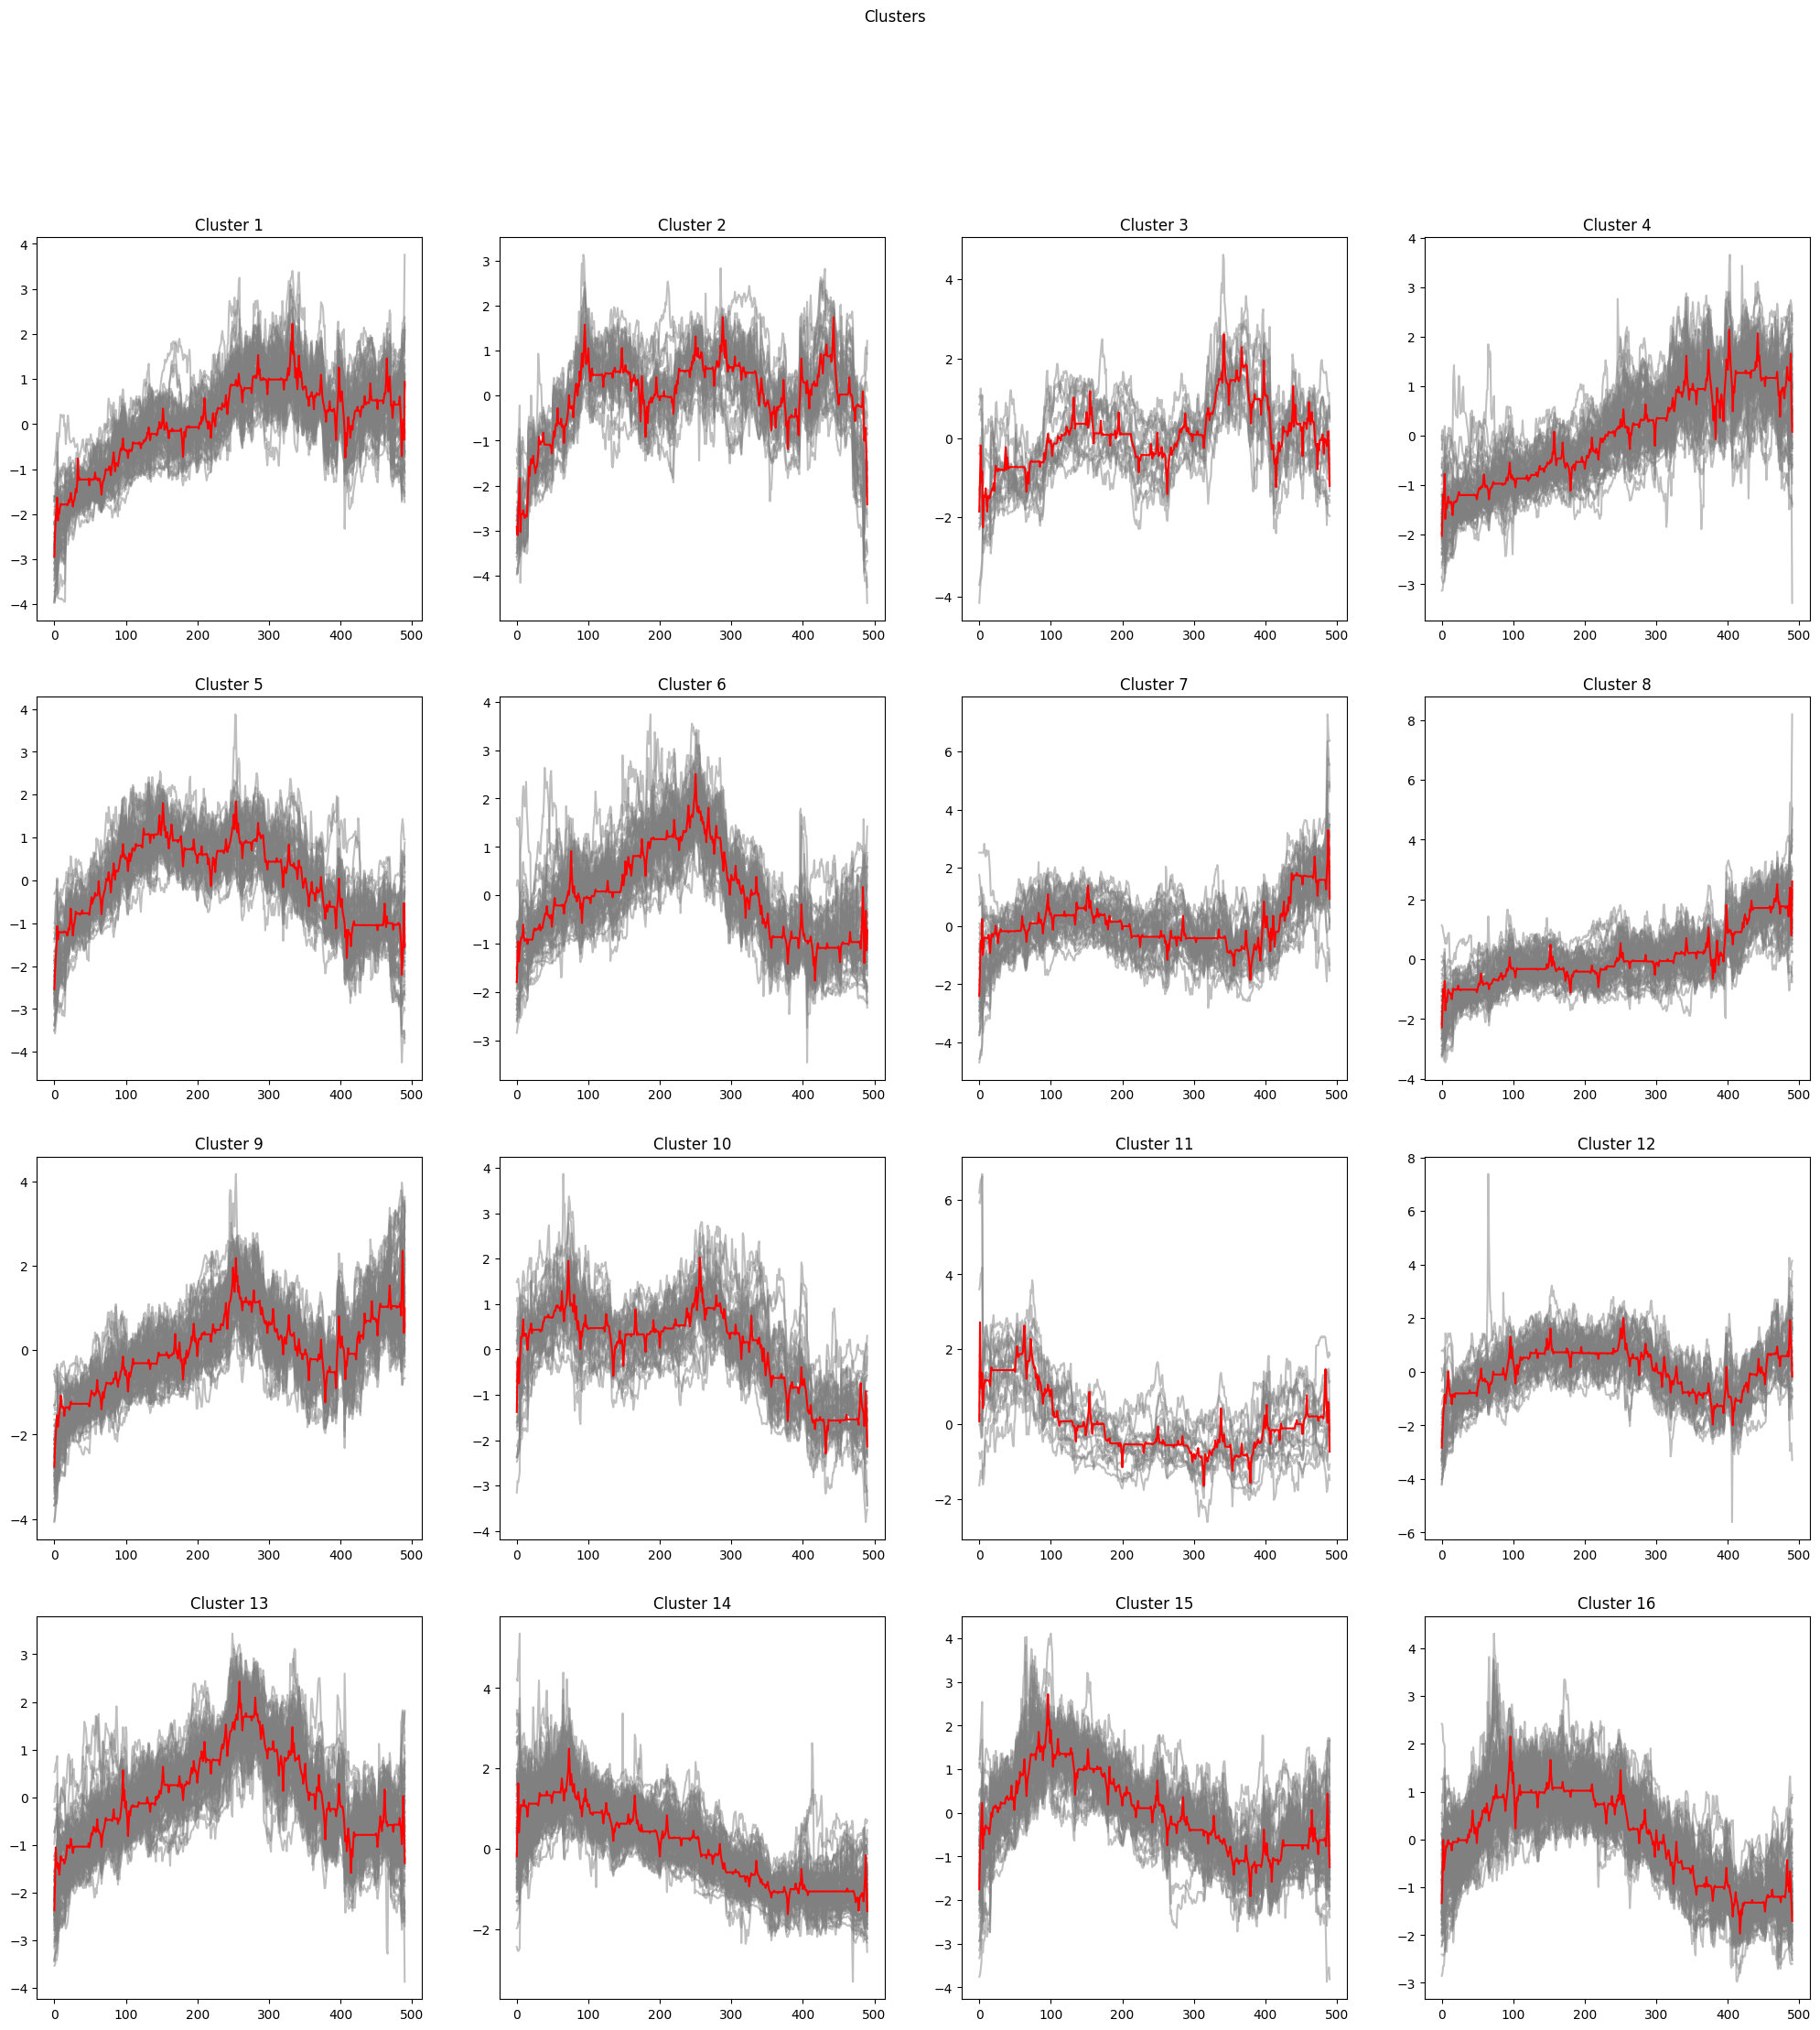

In [44]:
# Little handy function to plot series
def plot_som_series_averaged_center(som_x, som_y, win_map):
    fig, axs = plt.subplots(som_x,som_y,figsize=(25,25))
    fig.suptitle('Clusters')
    for x in tqdm(range(som_x)):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[cluster].plot(series,c="gray",alpha=0.5) 
                axs[cluster].plot(np.average(np.vstack(win_map[cluster]),axis=0),c="red")
            cluster_number = x*som_y+y+1
            axs[cluster].set_title(f"Cluster {cluster_number}")

    plt.show()
plot_som_series_dba_center(som_x, som_y, win_map)

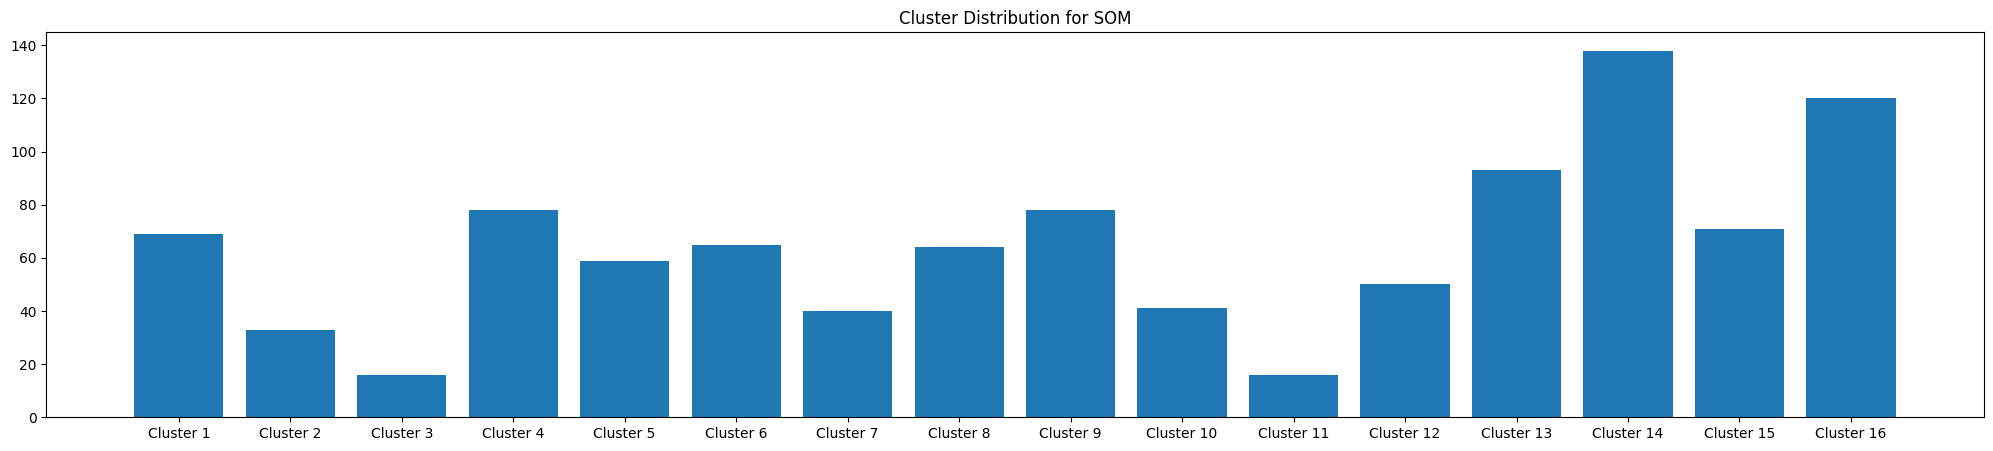

In [42]:
cluster_c = []
cluster_n = []
for x in range(som_x):
    for y in range(som_y):
        cluster = (x,y)
        if cluster in win_map.keys():
            cluster_c.append(len(win_map[cluster]))
        else:
            cluster_c.append(0)
        cluster_number = x*som_y+y+1
        cluster_n.append(f"Cluster {cluster_number}")

plt.figure(figsize=(25,5))
plt.title("Cluster Distribution for SOM")
plt.bar(cluster_n,cluster_c)
plt.show()

ValueError: operands could not be broadcast together with shapes (1031,) (4,4,491) 

In [1]:
from analytics_module.pair_finder import AutomaticAnalysis
from data_loader.get_data import GetStockData


ModuleNotFoundError: No module named 'analytics_module.pair_finder'

Sector


/Users/maxpowers/Job Applications/EquityPair/analytics_module/pair_finder.py:270: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.bar(keys, values)
/var/folders/b_/x8lg97sd7512c9qf07myy77m0000gn/T/ipykernel_69937/1687397109.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Industry
SOM


100%|██████████| 2391/2391 [00:18<00:00, 127.22it/s]


Training...
 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 11.072282777707255

...ready!


/var/folders/b_/x8lg97sd7512c9qf07myy77m0000gn/T/ipykernel_69937/1687397109.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


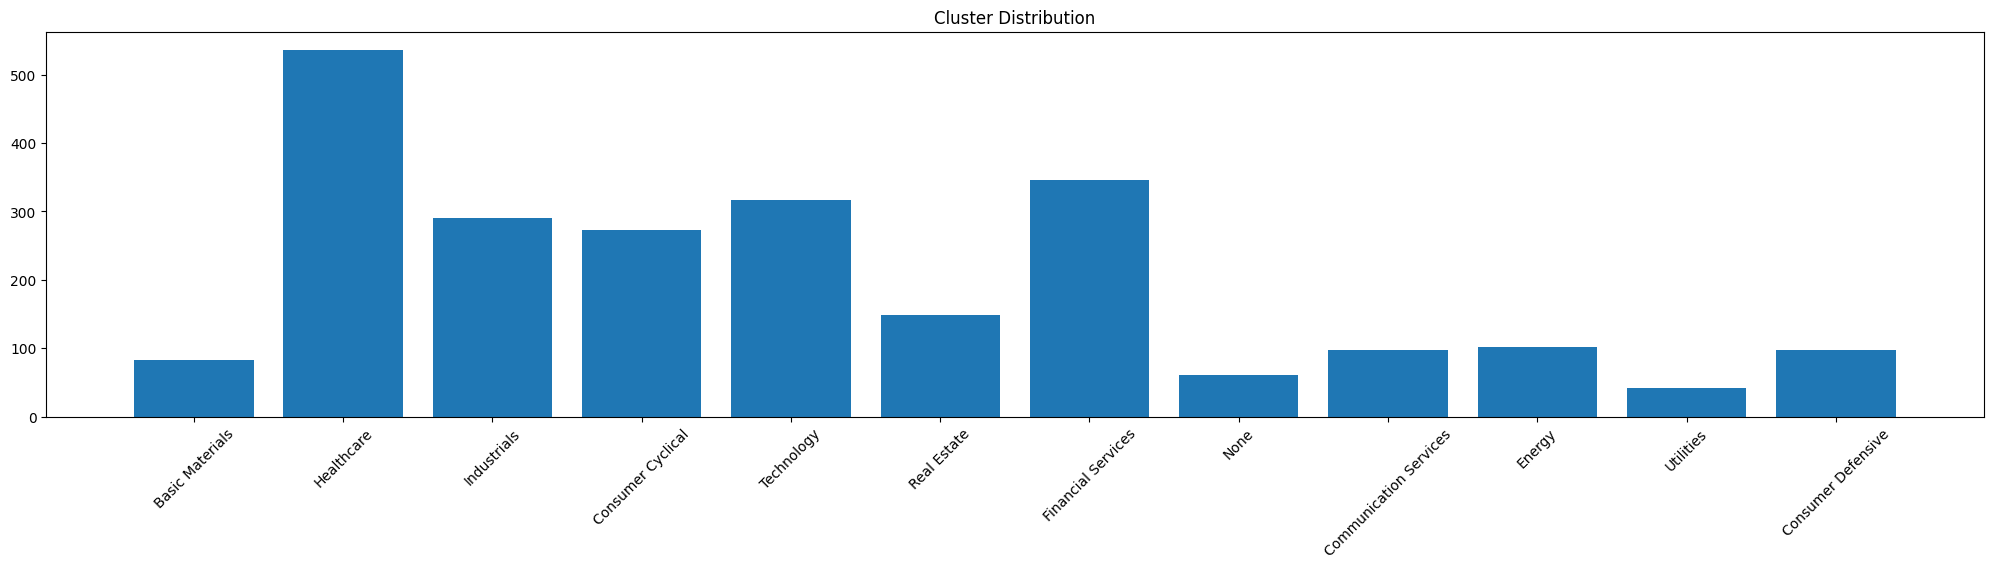

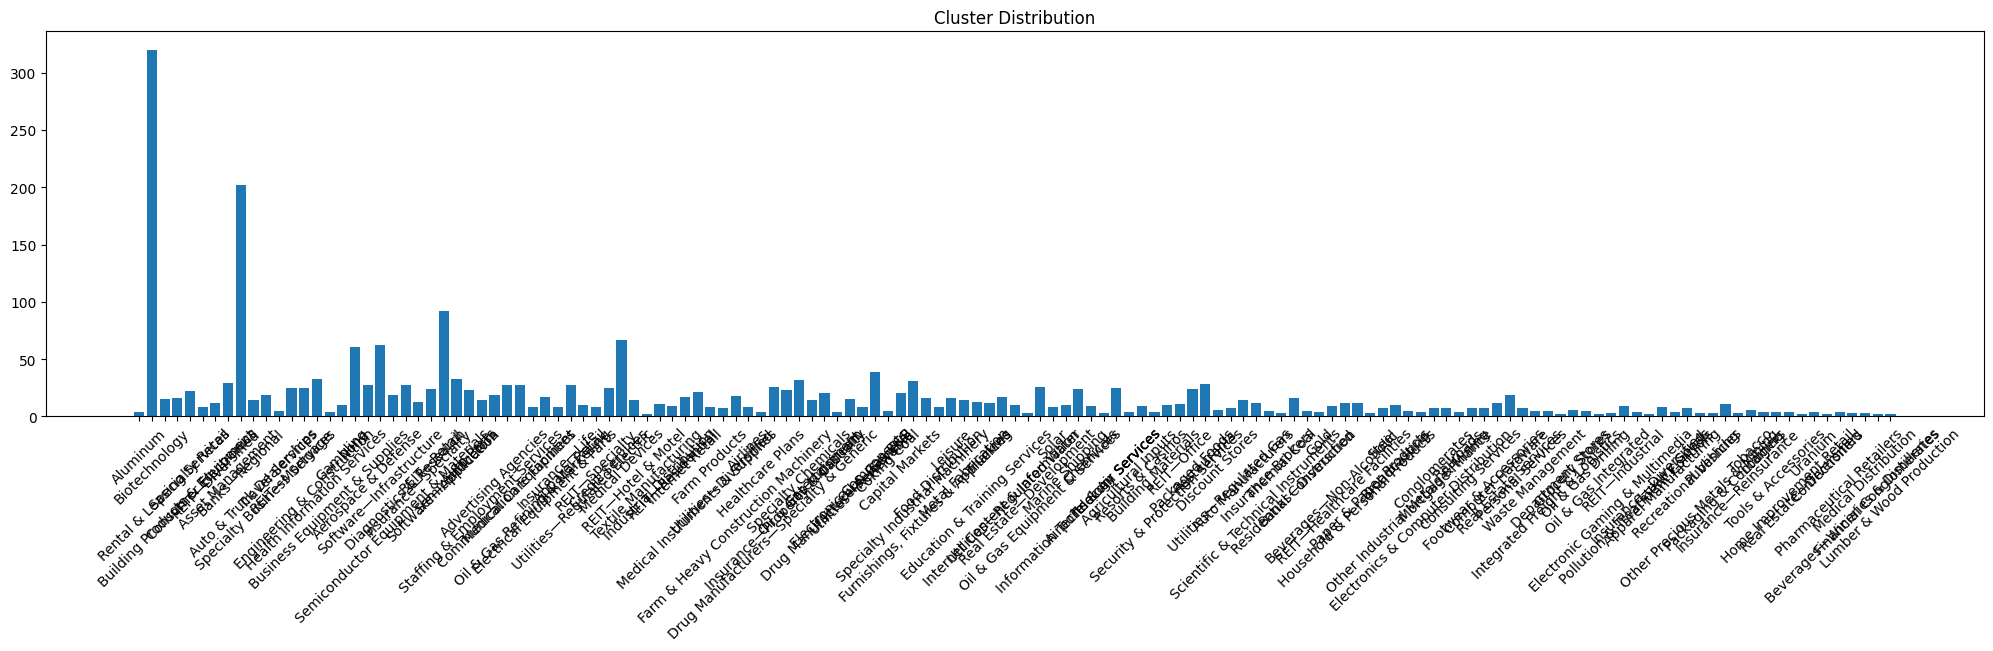

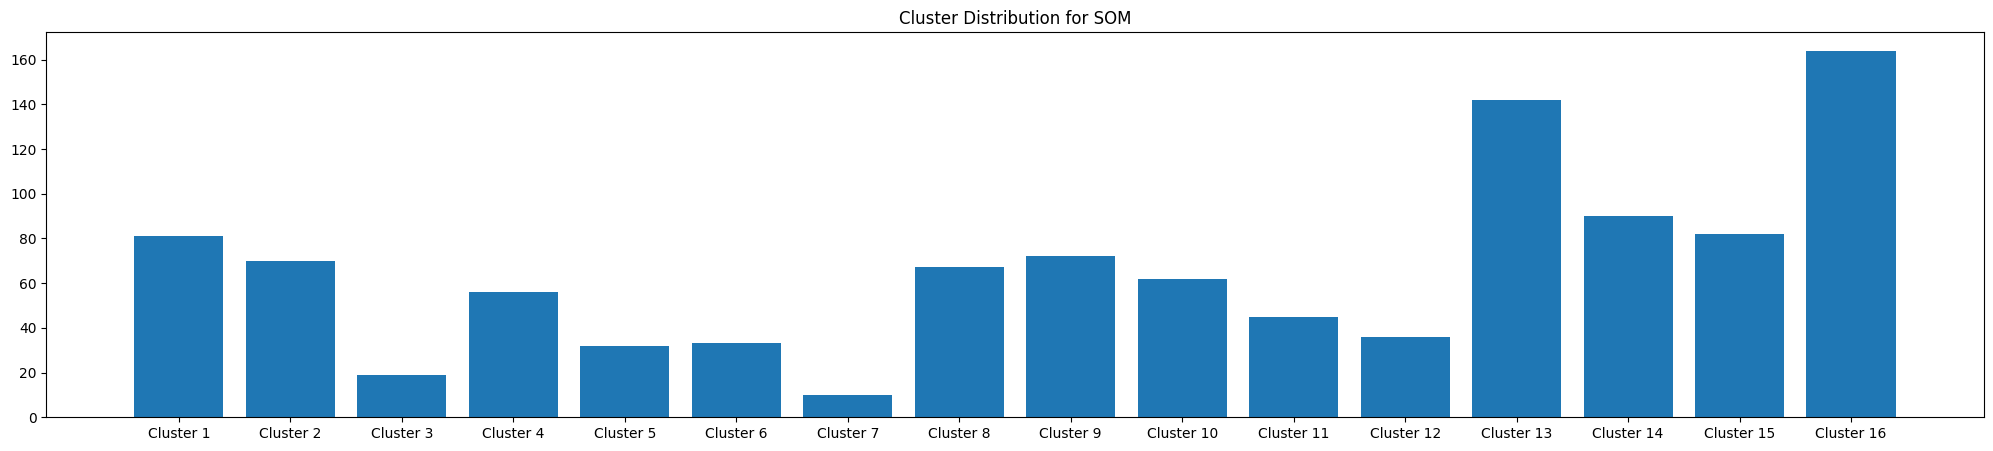

In [3]:
s_date = "2020-07-01"
e_date = "2023-06-01"

methods = ["All", "Random", "Sector", "Industry", "SOM"]
for method in methods[2:]:
    print(method)
    aa = AutomaticAnalysis(tickers, method)
    aa.g.set_dates(s_date, e_date)
    l = aa.get_candidates(s_date, e_date)
    fig = aa.plot_clusters()
    fig.show()

In [7]:
l

[('AA', 'AEL'),
 ('AA', 'AMRK'),
 ('AA', 'AMTB'),
 ('AA', 'ANDE'),
 ('AA', 'APOG'),
 ('AA', 'AR'),
 ('AA', 'ARCH'),
 ('AA', 'ASIX'),
 ('AA', 'AZN'),
 ('AA', 'BAL'),
 ('AA', 'BCC'),
 ('AA', 'BECN'),
 ('AA', 'BKR'),
 ('AA', 'BTU'),
 ('AA', 'BXC'),
 ('AA', 'CAR'),
 ('AA', 'CBT'),
 ('AA', 'CCB'),
 ('AA', 'CF'),
 ('AA', 'CHRD'),
 ('AA', 'CIVI'),
 ('AA', 'COKE'),
 ('AA', 'COOP'),
 ('AA', 'COST'),
 ('AA', 'CSGS'),
 ('AA', 'CTR'),
 ('AA', 'CYTK'),
 ('AA', 'DDS'),
 ('AA', 'DLTR'),
 ('AA', 'ECPG'),
 ('AA', 'ESQ'),
 ('AA', 'EVH'),
 ('AA', 'EXC'),
 ('AA', 'FANG'),
 ('AA', 'FBIZ'),
 ('AA', 'FGBI'),
 ('AA', 'FLNG'),
 ('AA', 'GATX'),
 ('AA', 'GNR'),
 ('AA', 'HCC'),
 ('AA', 'HPK'),
 ('AA', 'HWKN'),
 ('AA', 'IMKTA'),
 ('AA', 'ITCI'),
 ('AA', 'KBR'),
 ('AA', 'LRN'),
 ('AA', 'LXU'),
 ('AA', 'MAR'),
 ('AA', 'MCRI'),
 ('AA', 'MGY'),
 ('AA', 'MTDR'),
 ('AA', 'MUR'),
 ('AA', 'NBN'),
 ('AA', 'NBR'),
 ('AA', 'NC'),
 ('AA', 'NOG'),
 ('AA', 'NTR'),
 ('AA', 'NVEE'),
 ('AA', 'OPCH'),
 ('AA', 'OTTR'),
 ('AA', 'OVV'

In [4]:
from analytics_module.identify_tickers import IdentifyCandidates
from analytics_module.cluster_tickers import ClusterTickers
from data_loader.get_data import GetStockData

start_date = '2020-06-01'
end_date = '2023-06-01'
g = GetStockData()
tickers = g.get_ticker_names()
aa = ClusterTickers(tickers, "SOM")
l = aa.get_candidates(start_date, end_date)


100%|██████████| 2391/2391 [00:20<00:00, 119.35it/s]


Training...
 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 11.164092719304424

...ready!


In [29]:
import pandas as pd
aaa = ClusterTickers(tickers, "Industry")
l2 = aaa.get_candidates(start_date, end_date)
print(aaa.clusters.keys())
df = pd.DataFrame(
    {
        "col1": [2,3,4,5],
        "col2": [5,6,7,8]
    }
)

df.values

dict_keys(['Aluminum', 'Biotechnology', 'Rental & Leasing Services', 'Building Products & Equipment', 'Specialty Retail', 'Consumer Electronics', 'REIT—Diversified', 'Asset Management', 'Banks—Regional', 'Auto & Truck Dealerships', 'Specialty Business Services', 'Travel Services', 'REIT—Mortgage', 'Engineering & Construction', 'Health Information Services', 'Business Equipment & Supplies', 'Gambling', None, 'Aerospace & Defense', 'Software—Infrastructure', 'Semiconductor Equipment & Materials', 'Diagnostics & Research', 'Insurance—Specialty', 'REIT—Retail', 'Software—Application', 'Semiconductors', 'Auto Parts', 'Staffing & Employment Services', 'Advertising Agencies', 'Communication Equipment', 'Medical Care Facilities', 'Oil & Gas Refining & Marketing', 'Electrical Equipment & Parts', 'Insurance—Life', 'Apparel Retail', 'Utilities—Regulated Electric', 'REIT—Specialty', 'Credit Services', 'Medical Devices', 'REIT—Hotel & Motel', 'Textile Manufacturing', 'Industrial Distribution', 'REI

array([[2, 5],
       [3, 6],
       [4, 7],
       [5, 8]])

In [30]:
a=[(1,2), (2,3)]
import json
with open('tmp.json', 'w') as f:
    json.dump(a, f)

In [5]:
start_date = '2020-06-01'
end_date = '2023-06-01'

df = g.collate_dataset(tickers, start_date, end_date)
df_pivot = df.pivot(columns='ticker', values='close')

100%|██████████| 2391/2391 [00:20<00:00, 117.56it/s]


In [6]:
i = IdentifyCandidates(l, df_pivot)
i.iterate_tickers()

100%|██████████| 44926/44926 [20:47<00:00, 36.01it/s]


In [20]:
list_of_pairs = i.get_top_candidates(44926)
import pickle as pkl
with open('som_pairs_2020-06-01_2023_06-01.pkl', 'wb') as f:
    pkl.dump(list_of_pairs, f)


In [16]:
i.df.index[0], i.df.index[-1]

(Timestamp('2020-06-01 00:00:00'), Timestamp('2023-06-01 00:00:00'))

In [12]:
from datetime import datetime

t = datetime(2021,7,1)
def date_handler(date):
    try:
        date = datetime.strptime(date, "%Y-%m-%dT%H:%M:%S.%f").strftime("%Y-%m-%d")
        print("Succes1")
        print(date)
    except:
        try:
            date = date.strftime("%Y-%m-%d %H:%M:%S.%f")
            print("Succes2")
            print(date)


        except:
            print("Succes3")
            print(date)

            date = date
    return date
t = date_handler(t)
print(isinstance(t, str))

Succes2
2021-07-01 00:00:00.000000
True


In [22]:
from pymongo import MongoClient, errors, ASCENDING

client = MongoClient("mongodb://localhost:27017/")
db = client["equity_data"]

collection = db["pair_scoring"]
db.create_collection("pair_scoring")

collection.insert_one({
    "earliest_date": i.df.index[0],
    "latest_date": i.df.index[-1],
    "method": "SOM",
    "scoring": list_of_pairs
})


In [ ]:
from data_loader.misc_connect import MongoConnect

m = MongoConnect()

list(m.get_cluster('Industry', 'Biotechnology', '2020-06-01', '2023-07-01'))

In [4]:
import pandas as pd
import numpy as np

a = np.random.rand(100)
b = np.random.rand(100)
c = np.random.rand(100)
res = {"a": a, "b": b, "c": c}
df = pd.DataFrame(res)
df.index = pd.date_range(start="2020-01-01", periods=100)
df = df.transpose()
df.to_dict()

{Timestamp('2020-01-01 00:00:00'): {'a': 0.3073732804645317,
  'b': 0.5726334182840407,
  'c': 0.04751958844219473},
 Timestamp('2020-01-02 00:00:00'): {'a': 0.41103198125491014,
  'b': 0.6363933401421664,
  'c': 0.2325434843072851},
 Timestamp('2020-01-03 00:00:00'): {'a': 0.6613575160821527,
  'b': 0.6810772481060262,
  'c': 0.8815263861150691},
 Timestamp('2020-01-04 00:00:00'): {'a': 0.8104975519171776,
  'b': 0.8255844520921578,
  'c': 0.5660174744963095},
 Timestamp('2020-01-05 00:00:00'): {'a': 0.2215990315395422,
  'b': 0.5570601006445862,
  'c': 0.6067999116714506},
 Timestamp('2020-01-06 00:00:00'): {'a': 0.9262830064530284,
  'b': 0.4885682210746801,
  'c': 0.8755335827587942},
 Timestamp('2020-01-07 00:00:00'): {'a': 0.4191389675165391,
  'b': 0.06544600940175982,
  'c': 0.396824437538426},
 Timestamp('2020-01-08 00:00:00'): {'a': 0.91378610851052,
  'b': 0.8039649374919998,
  'c': 0.34001708304415423},
 Timestamp('2020-01-09 00:00:00'): {'a': 0.18305378683146467,
  'b': 0.

In [14]:
import json
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_json("res_1.json").transpose()


Final PnL: [199641.20169309]


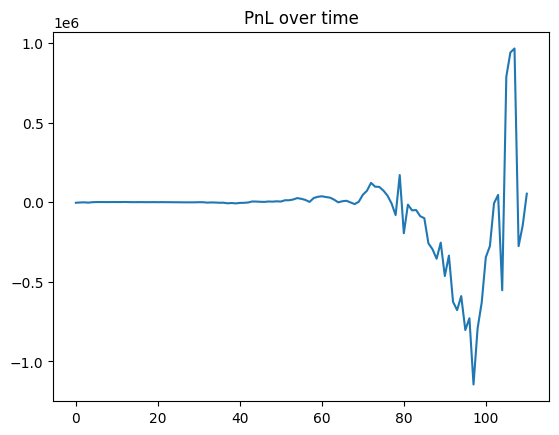

In [17]:
plt.plot(np.cumsum(df["pnl"].values))
plt.title("PnL over time")
print(f"Final PnL: {np.cumsum(df['pnl'].values[-1])}")

In [ ]:
from data_loader.misc_connect import MongoConnect
import json
m = MongoConnect()
with open('res_1.json') as f:
    data = json.load(f)

m.post_strategy_results("MD", "EA", "2020-06-01", "2022-06-01", data)